In [2]:
data = "gs://is-843-t4/notebooks/jupyter/data/"

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.types import (StructType, 
                               StructField, 
                               DateType, 
                               BooleanType,
                               DoubleType,
                               IntegerType,
                               StringType,
                               LongType,
                               FloatType,
                              TimestampType)
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
nyc_bikes = spark.read.format('bigquery').option('table', 'bigquery-public-data:new_york_citibike.citibike_trips').option('header', "true").load()
nyc_bikes.printSchema()

root
 |-- tripduration: long (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- start_station_id: long (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: long (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)
 |-- bikeid: long (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth_year: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- customer_plan: string (nullable = true)



In [6]:
nyc_bikes = nyc_bikes.withColumn("starttime", F.col("starttime").cast("timestamp"))
nyc_bikes = nyc_bikes.withColumn("stoptime", F.col("stoptime").cast("timestamp"))
nyc_bikes.printSchema()

root
 |-- tripduration: long (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- start_station_id: long (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: long (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)
 |-- bikeid: long (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth_year: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- customer_plan: string (nullable = true)



In [5]:
nyc_bikes.printSchema()

root
 |-- tripduration: long (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- start_station_id: long (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: long (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)
 |-- bikeid: long (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth_year: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- customer_plan: string (nullable = true)



In [7]:
nyc_bikes = nyc_bikes.na.drop(subset=["tripduration"])
nyc_bikes = nyc_bikes.na.drop(subset=["start_station_latitude","start_station_longitude","end_station_latitude","end_station_longitude"])

In [8]:
nyc_bikes = nyc_bikes.drop('tripduration', 'stoptime', 'start_station_id', 'start_station_name', 'end_station_id','end_station_name', 'end_station_latitude', 'end_station_longitude', 'bikeid','usertype','birth_year','gender','customer_plan','start_station_latitude','start_station_longitude')

In [9]:
nyc_bikes.printSchema()

root
 |-- starttime: timestamp (nullable = true)



In [9]:
from pyspark.sql import functions as F

nyc_bikes = nyc_bikes.withColumn("starttime", F.col("starttime").cast("timestamp"))

In [9]:
nyc_bikes.printSchema()

root
 |-- starttime: timestamp (nullable = true)



In [10]:
nyc_bikes.limit(3).toPandas()

,starttime
0,2017-10-01 09:16:46
1,2014-07-31 23:46:38
2,2014-12-11 11:35:12


In [10]:
nyc_bikes.cache()

DataFrame[starttime: timestamp]

In [11]:
nyc_bikes = nyc_bikes.repartition(20)

In [15]:
print(" The NYC Bikes dataframe has {} records".format(nyc_bikes.count()))

 The NYC Bikes dataframe has 53108721 records


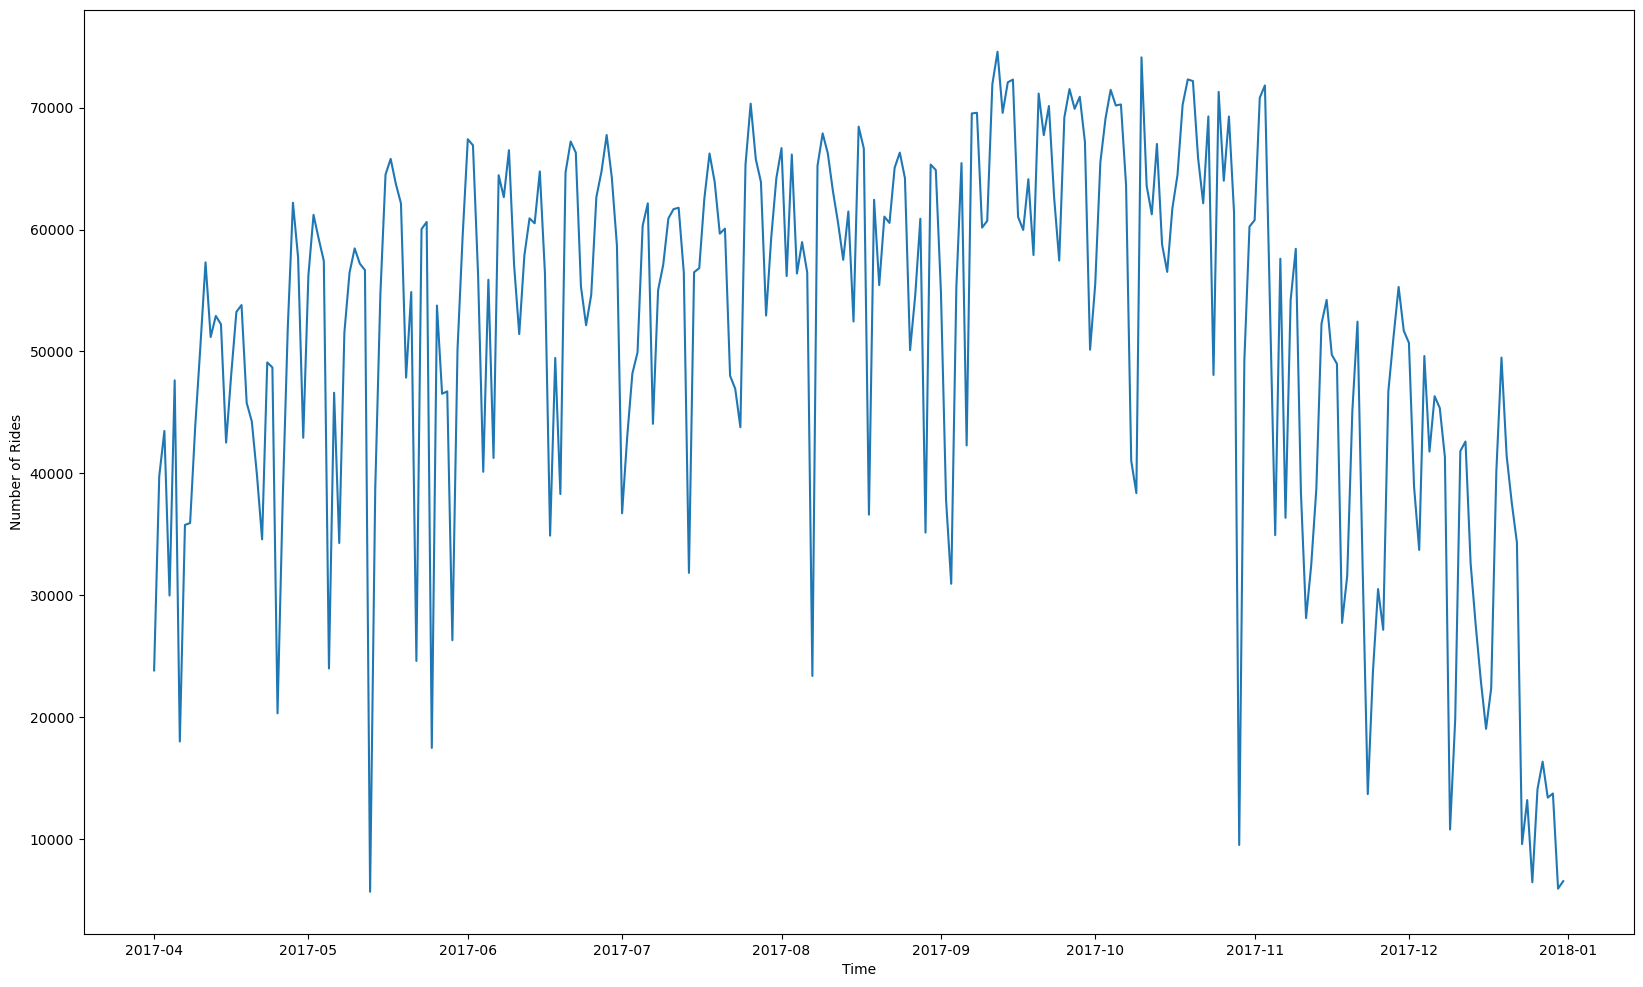

In [12]:
nyc_bikes = nyc_bikes.filter((F.year("starttime") == 2017))

rides_over_time = nyc_bikes.groupBy(F.date_trunc("day", "starttime").alias("day")).count()

rides_over_time = rides_over_time.orderBy(F.asc("day"))

rides_over_time_pd = rides_over_time.select("*").toPandas()

fig = plt.figure(figsize=(20, 12))

# Plot the number of rides over time
plt.plot(rides_over_time_pd["day"],rides_over_time_pd["count"])
plt.xlabel("Time")
plt.ylabel("Number of Rides")
plt.show()

In [19]:
pandas_df.head()

,day,count
0,2017-04-01,23849
1,2017-04-02,39780
2,2017-04-03,43485
3,2017-04-04,29991
4,2017-04-05,47636


In [13]:
weather_schema = StructType([StructField("episode_id", IntegerType(), True),
                            StructField("event_id", IntegerType(), True),
                            StructField("state", StringType(), True ),
                            StructField("state_fips_code", DoubleType(), True),
                            StructField("event_type", StringType(), True),
                            StructField("cz_type", StringType(), True  ),
                            StructField("cz_fips_code", DoubleType(), True ),
                            StructField("cz_name", StringType(), True ),
                            StructField("wfo", StringType(), True),
                            StructField("event_begin_time", TimestampType(), True),
                            StructField("event_timezone", StringType(), True),
                            StructField("event_end_time", TimestampType(), True),
                            StructField("injuries_direct", IntegerType(), True),
                            StructField("injuries_indirect", IntegerType(), True),
                            StructField("deaths_direct", IntegerType(), True ),
                            StructField("deaths_indirect", IntegerType(), True),
                            StructField("damage_property", IntegerType(), True ),
                            StructField("damage_crops", IntegerType(), True),
                            StructField("source", StringType(), True ),
                            StructField("magnitude", IntegerType(), True),
                            StructField("magnitude_type", StringType(), True),
                            StructField("flood_cause", StringType(), True ),
                            StructField("tor_f_scale", DoubleType(), True ),
                            StructField("tor_length", IntegerType(), True ),
                            StructField("tor_width", IntegerType(), True ),
                            StructField("tor_other_wfo", IntegerType(), True ),
                            StructField("location_index", IntegerType(), True ),
                            StructField("event_range", IntegerType(), True ),
                            StructField("event_azimuth", IntegerType(), True ),
                            StructField("reference_location", IntegerType(), True ),
                            StructField("event_latitude", DoubleType(), True ),
                            StructField("event_longitude", DoubleType(), True ),
                            StructField("event_point", IntegerType(), True )
                            ])

In [14]:
weather = spark.read.format("csv")\
  .option("header", "true")\
  .schema(weather_schema)\
  .load(data + "storms_2017.csv")

In [16]:
weather.printSchema()


root
 |-- episode_id: integer (nullable = true)
 |-- event_id: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- state_fips_code: double (nullable = true)
 |-- event_type: string (nullable = true)
 |-- cz_type: string (nullable = true)
 |-- cz_fips_code: double (nullable = true)
 |-- cz_name: string (nullable = true)
 |-- wfo: string (nullable = true)
 |-- event_begin_time: timestamp (nullable = true)
 |-- event_timezone: string (nullable = true)
 |-- event_end_time: timestamp (nullable = true)
 |-- injuries_direct: integer (nullable = true)
 |-- injuries_indirect: integer (nullable = true)
 |-- deaths_direct: integer (nullable = true)
 |-- deaths_indirect: integer (nullable = true)
 |-- damage_property: integer (nullable = true)
 |-- damage_crops: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- magnitude: integer (nullable = true)
 |-- magnitude_type: string (nullable = true)
 |-- flood_cause: string (nullable = true)
 |-- tor_f_scale: double (nu

In [15]:
required_cols = ['state', 'cz_name','event_type','state_fips_code', 'event_begin_time']
weather = weather.select(required_cols)

In [16]:
weather.cache()

DataFrame[state: string, cz_name: string, event_type: string, state_fips_code: double, event_begin_time: timestamp]

In [17]:
print(" The Storms 2017 dataframe has {} records".format(weather.count()))

 The Storms 2017 dataframe has 81822 records


In [20]:
print(" The NY 2017 dataframe has {} records".format(ny_weather_df.count()))

 The NY 2017 dataframe has 2679 records


In [19]:
ny_weather_df = weather.filter(weather.state_fips_code == 36)

In [21]:
ny_weather_df = ny_weather_df.dropDuplicates()
#clean the data

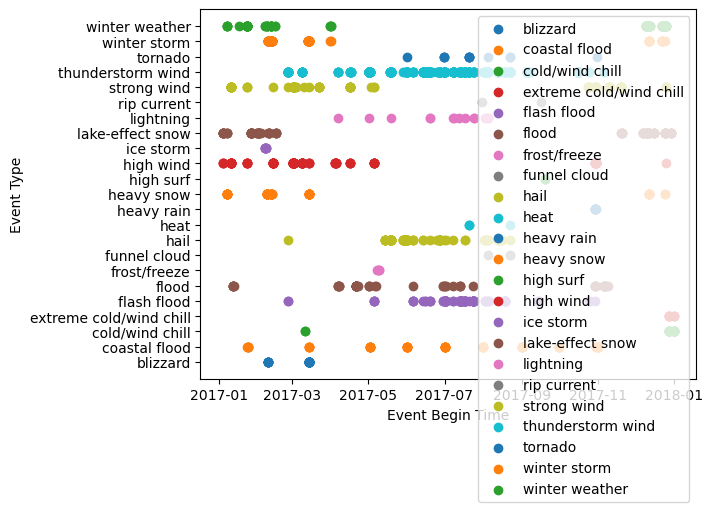

In [22]:
ny_weather_pd = ny_weather_df.select("*").toPandas()

fig, ax = plt.subplots()

for event_type, group in ny_weather_pd.groupby('event_type'):
    ax.scatter(group['event_begin_time'], [event_type] * len(group), label=event_type)

ax.legend()
ax.set_xlabel('Event Begin Time')
ax.set_ylabel('Event Type')

plt.show()

In [23]:
df_truncated = ny_weather_df.select(F.date_trunc('day', ny_weather_df.event_begin_time).alias('date'),'event_type')
#truncate datetime to day

In [24]:
df_combined = df_truncated.groupby('date').agg(F.concat_ws(", ", F.collect_list('event_type')).alias('event_types'))
#combine event_types so there is one line per date

In [25]:
df_combined_pd = df_combined.toPandas().reset_index()

In [112]:
print(df_combined_pd)

     index       date                                        event_types
0        0 2017-08-02  flash flood, lightning, thunderstorm wind, thu...
1        1 2017-07-17  hail, flash flood, flash flood, flash flood, t...
2        2 2017-12-25  high wind, winter weather, lake-effect snow, w...
3        3 2017-07-30                                        rip current
4        4 2017-11-07                                              flood
..     ...        ...                                                ...
121    121 2017-06-20                                  thunderstorm wind
122    122 2017-01-13                                              flood
123    123 2017-02-10                                   lake-effect snow
124    124 2017-05-08                                       frost/freeze
125    125 2017-05-31  hail, hail, hail, hail, thunderstorm wind, thu...

[126 rows x 3 columns]


In [26]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define a UDF to remove duplicates from a string of comma-separated values
@udf(StringType())
def remove_duplicates(s):
    return ', '.join(sorted(set(x.strip() for x in s.split(','))))

# Apply the remove_duplicates() UDF to the 'event_types' column of df_combined
df_combined = df_combined.withColumn('event_types', remove_duplicates(df_combined['event_types']))

# Print the resulting DataFrame
df_combined.show()

+-------------------+--------------------+
|               date|         event_types|
+-------------------+--------------------+
|2017-08-02 00:00:00|flash flood, hail...|
|2017-07-17 00:00:00|flash flood, hail...|
|2017-12-25 00:00:00|high wind, lake-e...|
|2017-02-25 00:00:00|flash flood, hail...|
|2017-03-14 00:00:00|blizzard, coastal...|
|2017-09-05 00:00:00|   thunderstorm wind|
|2017-07-23 00:00:00|flash flood, thun...|
|2017-06-26 00:00:00|                hail|
|2017-02-09 00:00:00|blizzard, heavy s...|
|2017-10-30 00:00:00|coastal flood, fl...|
|2017-07-13 00:00:00|flash flood, floo...|
|2017-03-10 00:00:00|         strong wind|
|2017-05-14 00:00:00|                hail|
|2017-08-15 00:00:00|hail, thunderstor...|
|2017-11-19 00:00:00|lake-effect snow,...|
|2017-01-12 00:00:00|               flood|
|2017-01-27 00:00:00|    lake-effect snow|
|2017-09-19 00:00:00|           high surf|
|2017-08-22 00:00:00|funnel cloud, hai...|
|2017-12-22 00:00:00|winter storm, win...|
+----------

In [27]:
df_combined = df_combined.withColumn('date', F.to_date(df_combined['date']))
df_combined = df_combined.orderBy(F.asc("date"))

In [121]:
df_combined.limit(10).toPandas()

,date,event_types
0,2017-01-04,"high wind, lake-effect snow"
1,2017-01-05,lake-effect snow
2,2017-01-07,"heavy snow, lake-effect snow, winter weather"
3,2017-01-10,"high wind, strong wind"
4,2017-01-11,high wind
5,2017-01-12,flood
6,2017-01-13,flood
7,2017-01-17,winter weather
8,2017-01-23,"coastal flood, high wind, strong wind, winter ..."
9,2017-01-24,"coastal flood, high wind"


In [43]:
joined_df = rides_over_time.join(df_combined, rides_over_time['day'] == df_combined['date'], how='outer')
joined_df = joined_df.orderBy(F.asc("day"))
#join the rides and weather data

In [29]:
joined_df.cache()
joined_df = joined_df.repartition(20)

In [46]:
joined_df = joined_df.na.drop(how='any')
joined_df.show()



+-------------------+-----+----------+--------------------+
|                day|count|      date|         event_types|
+-------------------+-----+----------+--------------------+
|2017-04-01 00:00:00|23849|2017-04-01|winter storm, win...|
|2017-04-04 00:00:00|29991|2017-04-04|           high wind|
|2017-04-06 00:00:00|18020|2017-04-06|flood, lightning,...|
|2017-04-07 00:00:00|35779|2017-04-07|               flood|
|2017-04-16 00:00:00|48140|2017-04-16|high wind, strong...|
|2017-04-20 00:00:00|44264|2017-04-20|               flood|
|2017-04-21 00:00:00|39868|2017-04-21|               flood|
|2017-04-22 00:00:00|34596|2017-04-22|               flood|
|2017-05-01 00:00:00|56218|2017-05-01|flood, lightning,...|
|2017-05-02 00:00:00|61207|2017-05-02|coastal flood, st...|
|2017-05-05 00:00:00|24009|2017-05-05|flash flood, high...|
|2017-05-06 00:00:00|46618|2017-05-06|               flood|
|2017-05-07 00:00:00|34293|2017-05-07|        frost/freeze|
|2017-05-08 00:00:00|51553|2017-05-08|  

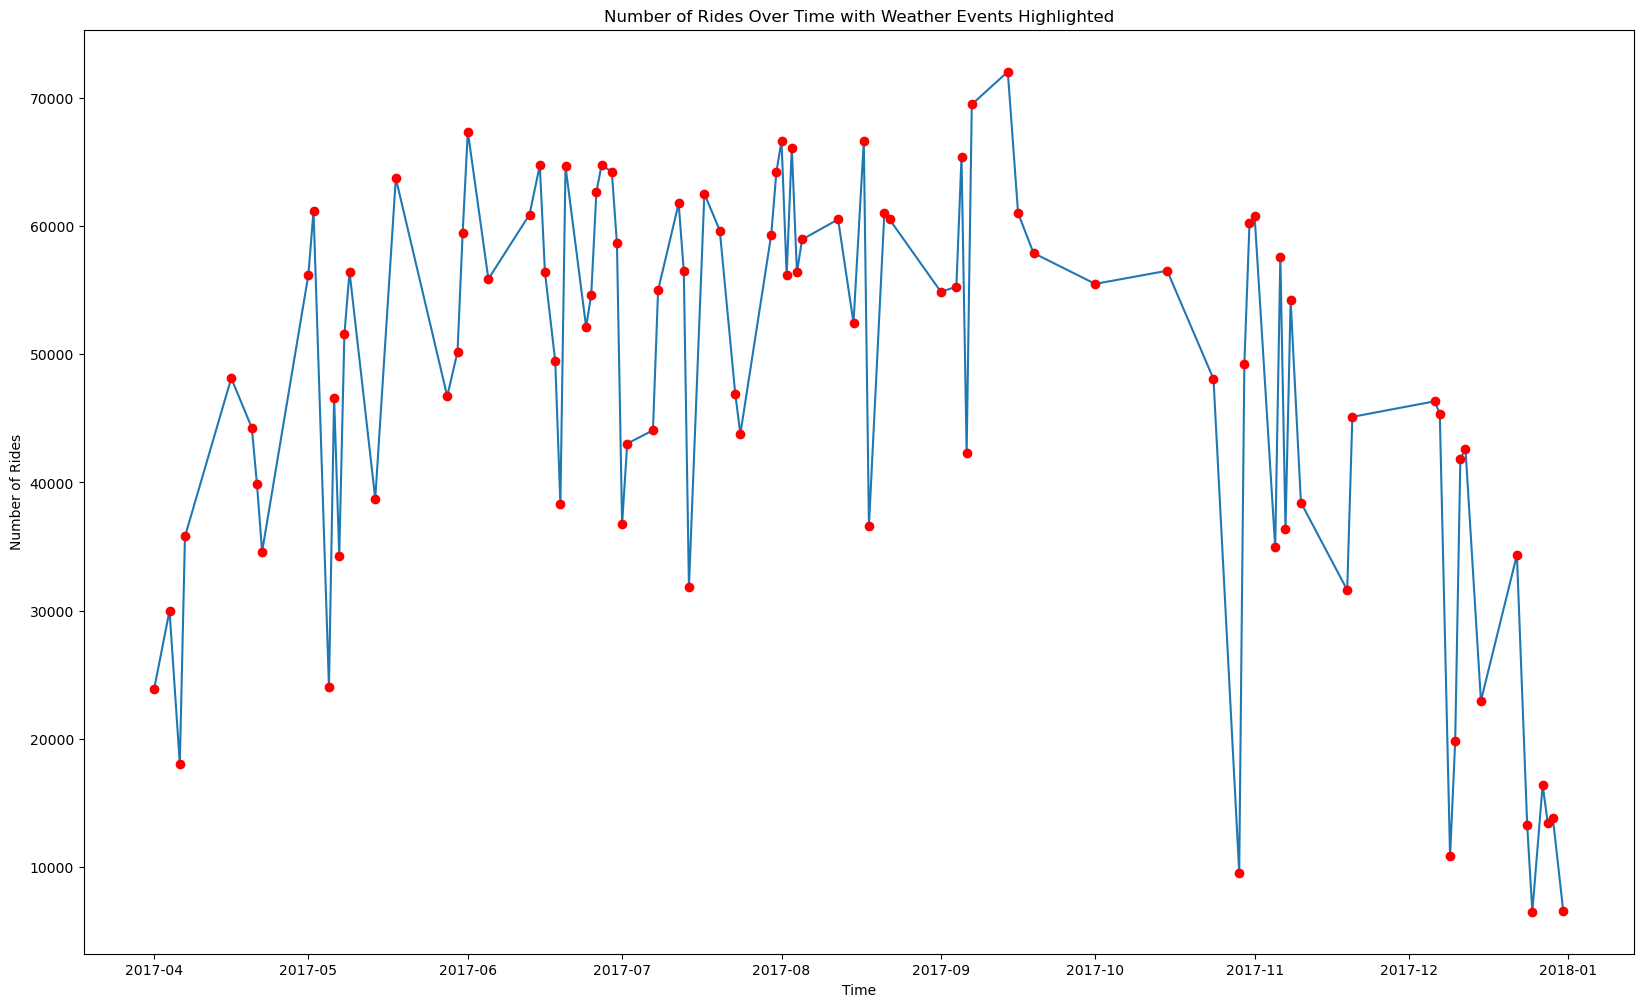

In [47]:
joined_df_pd = joined_df.select("*").toPandas()

# Filter out null values from the "day" column
joined_df_pd = joined_df_pd[joined_df_pd["day"].notnull()]

fig = plt.figure(figsize=(20, 12))

# Plot the number of rides over time
plt.plot(joined_df_pd["day"], joined_df_pd["count"])

# Add a dot for each row where the "event_types" column is not null
plt.plot(joined_df_pd.loc[joined_df_pd["event_types"].notnull(), "day"],
         joined_df_pd.loc[joined_df_pd["event_types"].notnull(), "count"],
         marker='o', linestyle='None', color='red')

plt.xlabel("Time")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Over Time with Weather Events Highlighted")

plt.show()
#Graph shows the number rides over time with reported weather events highlighted in red. 

